In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# import data from previous wrangle and EDA notebooks
df_houses = pd.read_csv('houses.csv')
test = pd.read_csv('houses_test.csv')

In [4]:
df_houses

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1455,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,0,4,NaN,0,2,2010,WD,Normal,210000
1456,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,0,5,Shed,2500,5,2010,WD,Normal,266500
1457,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_houses.drop(columns =['Unnamed: 0','Id'], inplace=True)
Id = test['Id']
test.drop(columns =['Unnamed: 0', 'Id'], inplace=True)

In [6]:
#split numeric features
df_houses_numeric = df_houses.select_dtypes([np.number])
df_test_numeric = test.select_dtypes([np.number])
df_houses_numeric = df_houses_numeric.drop(columns=['SalePrice'])
houses_num_col = df_houses_numeric.columns

In [7]:
df_houses_numeric.shape

(1459, 51)

In [8]:
df_houses_numeric.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [9]:
# examin outliers

q5, q95 = df_houses_numeric.quantile(.005, axis=0), df_houses_numeric.quantile(.995, axis=0)
iqr = q95 - q5


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


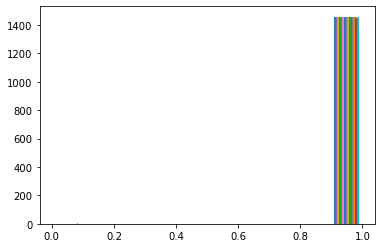

In [10]:
plt.hist((df_houses_numeric <= (q95 + iqr * 1.5)));

In [11]:
#q95

In [12]:
# save outliers to be removed later
drop_out = df_houses_numeric[(df_houses_numeric > (q95 + iqr * 1.5)).any(axis=1)]

drop_out


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold
197,75,174.0,25419,8,4,1918,1990,0.0,4,4,...,16,552,0,0,512,5,5,0,3,2006
249,50,60.0,159000,6,7,1958,2006,472.0,4,3,...,98,0,0,0,0,0,0,500,6,2007
313,20,150.0,215245,7,5,1965,1965,0.0,3,3,...,0,0,0,0,0,0,0,0,6,2009
335,190,60.0,164660,5,6,1965,1965,0.0,3,3,...,0,0,0,0,0,0,0,700,8,2008
346,20,60.0,12772,6,8,1960,1998,0.0,3,4,...,0,0,0,0,0,0,0,15500,4,2007
810,20,78.0,10140,6,6,1974,1999,99.0,3,3,...,0,0,0,0,648,2,5,0,1,2006
1170,80,76.0,9880,6,6,1977,1977,0.0,3,3,...,0,0,0,0,576,4,5,0,7,2008
1182,60,160.0,15623,10,5,1996,1996,0.0,4,3,...,78,0,0,0,555,5,4,0,7,2007
1230,90,60.0,18890,5,5,1977,1977,1.0,3,3,...,24,145,0,0,0,0,0,8300,8,2007
1298,60,313.0,63887,10,5,2008,2008,796.0,5,3,...,292,0,0,0,480,4,0,0,1,2008


In [13]:
#drop_out.shape

In [14]:
# scale numeric features

from sklearn.preprocessing import RobustScaler  
scaler = RobustScaler ()

df_houses_numeric = scaler.fit_transform(df_houses_numeric)

# test is transform only
df_test_numeric = scaler.transform(df_test_numeric)

In [15]:
#replacing numeric features with scaled versions

df_houses_numeric = pd.DataFrame(df_houses_numeric, columns=houses_num_col)
df_houses[houses_num_col] = df_houses_numeric

In [16]:
#drop outliers from train only

df_houses.drop(drop_out.index, inplace=True)

In [17]:
#replacing numeric features in test with scaled versions

df_test_numeric = pd.DataFrame(df_test_numeric, columns=houses_num_col)
test[houses_num_col] = df_test_numeric

In [19]:
#df_houses.columns.difference(test.columns)

In [21]:
# make dummies for catagorical features
df_train = pd.get_dummies(df_houses)
df_test = pd.get_dummies(test)

In [22]:

dif_test = df_train.columns.difference(df_test.columns).values
#dif_test

In [23]:
# not all dummie features in both sets. We'll fill with 0s to match shapes
df_test[dif_test] = 0

In [24]:
dif_train = df_test.columns.difference(df_train.columns).values
df_train[dif_train] = 0

In [25]:
#remove sales price column from test it got added on with the numeric values
df_test= df_test.drop(columns=['SalePrice'])

In [27]:
#double check the dataframe
df_houses.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [28]:
df_train.shape

(1447, 234)

In [30]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MiscFeature_Gar2
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,...,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.0
mean,0.135936,0.258429,0.153375,0.046994,0.574292,-0.037980,-0.247408,0.625963,0.395301,0.082239,...,0.083621,0.002073,0.867312,0.068417,0.002764,0.007602,0.013822,0.821700,0.085695,0.0
std,0.845741,1.109175,1.508585,0.689681,1.113156,0.657909,0.558992,1.095251,0.573678,0.350078,...,0.276915,0.045502,0.339355,0.252548,0.052522,0.086887,0.116791,0.382897,0.280009,0.0
min,-0.600000,-2.210526,-2.017020,-2.500000,-4.000000,-2.195652,-1.189189,0.000000,-1.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-0.600000,-0.157895,-0.487667,-0.500000,0.000000,-0.413043,-0.729730,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,0.000000,0.000000,-0.009373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,0.400000,0.842105,0.500493,0.500000,1.000000,0.597826,0.270270,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,2.800000,13.157895,26.066108,2.000000,4.000000,0.804348,0.432432,9.726444,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [31]:
df_test.shape

(1459, 233)

In [32]:
# split into train and test
X = df_train.drop("SalePrice", axis = 1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [33]:
#df_test.columns.difference(X_train.columns).values

In [34]:
#start with a basic regression


model1 = LinearRegression()

model1.fit(X_train, y_train)

print('cv_score', np.mean(cross_val_score(model1, X_train, y_train, cv=5)))

y_pred = model1.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R2 score:', r2_score(y_test, y_pred))

cv_score -37159428380478.14
MAE: 1415223541.659301
MSE: 1.9689891595674337e+20
RMSE: 14032067415.62851
R2 score: -30034164669.645905


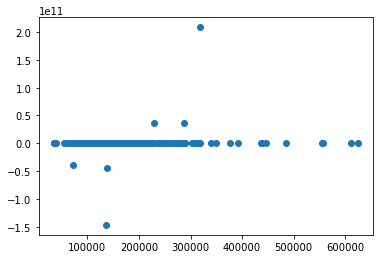

In [35]:
#check out the odd results
plt.scatter(y_test, y_pred)

The regular model is predicting a negative price throwing the whole model off. We'll try a veriety of other models.

In [37]:
y_dif = np.abs(y_test-y_pred )
#y_dif.sort_values(ascending=False)[0:20]

In [59]:
#import models we'd like to try

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


import warnings
warnings.filterwarnings("ignore", category=[ConvergenceWarning, RuntimeWarning])

AssertionError: category must be a class

In [38]:
#define a function to use random search to find best paramiters

from sklearn.model_selection import RandomizedSearchCV

def find_best_param(model, param_grid):
        model_cv = RandomizedSearchCV(model, param_grid, cv=5)
        model_cv.fit(X_train, y_train)
        return model_cv.best_estimator_



In [50]:



#define empty dicts for what we might want to access later

model_scores ={}
y_preds = {}
params_used ={}

# define funtion that calls our find_best_params function to initiate new model 
# and save our model_scores, y_preds, and params_used for each model that we try

def scoring(model_name, model, param_grid):
    
    
    
    new_model = find_best_param(model, param_grid)
    new_model.fit(X_train, y_train)

    y_pred = new_model.predict(X_test)
    
   
    params_used[model_name] = new_model
    y_preds[model_name] = y_pred
    
    model_scores[model_name] = {'model used': model,
                                'cv_score': np.mean(cross_val_score(new_model, X_train, y_train, cv=5)),
                                'MAE': mean_absolute_error(y_test, y_pred),
                                'MSE': mean_squared_error(y_test, y_pred),
                                'RMSE': mean_squared_error(y_test, y_pred, squared=False),
                                'R2 score': r2_score(y_test, y_pred)
                               }
    model_scores, y_preds, params_used

In [51]:
#test the find_best_params function

find_best_param(Ridge(), {'alpha': np.arange(0.001, 300)})

Ridge(alpha=14.000999999999998)

In [52]:
#define params and run Ridge model

alpha_params = {'alpha': np.arange(0.001, 200)}

scoring('model2', Ridge(), alpha_params)

In [53]:
# useing same params run Lasso

scoring('model3', Lasso(), alpha_params);

In [54]:
# useing same params run ElasticNet

scoring('model4', ElasticNet(), alpha_params)

In [55]:
RFR_params = {'n_estimators': [300, 500, 800, 1000],
              'max_features': ['auto', 'log2'],
              'max_depth': [10, 20, 30, 40, 50, None],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 2, 5, 10, 15]
             }

scoring('model5', RandomForestRegressor(), RFR_params)

In [56]:
# define params and run DecisionTree

DTR_params = {'max_depth': np.arange(1, 20),
              'min_samples_split': range(10, 60)}


scoring('model6', DecisionTreeRegressor(), DTR_params)

In [57]:
# define params and run GradientBoost

GBR_params = {'learning_rate': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100],
              'n_estimators': [ 50, 250, 500, 750, 1000],
              'max_features': ['auto', 'log2'],
              'max_depth': [1, 3, 5, 7, 10, 25, 50],
              'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
              'min_samples_leaf': [1, 2, 5, 10, 15, 20, 25]
             }


scoring('model7', GradientBoostingRegressor(), GBR_params);

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targe

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targe

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targe

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:691: RuntimeWarning: overfl

In [60]:
# define params and run SVR

SVR_params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              }

scoring('model8', SVR(), SVR_params)

In [61]:
# time to check out some scores

scores = pd.DataFrame(model_scores).T
scores.round(decimals=2)

,model used,cv_score,MAE,MSE,RMSE,R2 score
model2,Ridge(),0.855835,16536.090741,678545203.494183,26048.900236,0.896497
model3,Lasso(),0.856517,16569.815058,668904100.895889,25863.18041,0.897968
model4,ElasticNet(),0.732232,24016.832982,1642850242.506027,40532.089047,0.749406
model5,RandomForestRegressor(),0.846038,17003.153077,779992855.001868,27928.352171,0.881023
model6,DecisionTreeRegressor(),0.751162,23455.082251,1255691455.118821,35435.736977,0.808462
model7,GradientBoostingRegressor(),0.860772,14181.544131,546412523.024988,23375.468402,0.916652
model8,SVR(),0.065242,49899.366171,5873040480.614312,76635.765023,0.10415


Model 7 GradientBoost is slightly better then Lasso. Lets see if we can explore what is going on

In [62]:
#what values paramiters did we end up with?
#params_used

In [63]:
# How similar are the actual y and predicted y values?

#pd.DataFrame(y_test).describe()

In [64]:

#pd.DataFrame(y_preds['model7']).describe()

The GradientBoost is not predicting the extreams of the test set. The STD is off by about 7500 and our mean is off by almost 1500

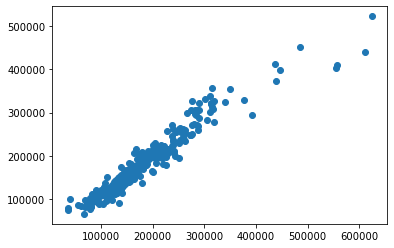

In [65]:
# a quick visual
plt.scatter(y_test, y_preds['model7'])

In [67]:
#check highest residuals
y_dif = np.abs(y_test-y_preds['model7'] )
y_dif.sort_values(ascending=False)[:10]

898     171597.982763
440     151836.237661
1046    146051.686388
1169    101771.647237
1181     98522.351027
58       64674.672758
30       60886.280928
864      54526.277128
261      52030.166969
336      48318.495757
Name: SalePrice, dtype: float64

Clearly some high redisuals for the higher priced houses. Lets see the model on the train scores.

In [68]:
model7_train = params_used['model7']

model7_train.fit(X_train, y_train)
y_pred_train = model7_train.predict(X_train)

print('cv_score:', np.mean(cross_val_score(model7_train, X_train, y_train, cv=5)),
      'MAE:', mean_absolute_error(y_train, y_pred_train),
      'MSE:', mean_squared_error(y_train, y_pred_train),
      'RMSE:', mean_squared_error(y_train, y_pred_train, squared=False),
      'R2 score:', r2_score(y_train, y_pred_train))

cv_score: 0.8628422619316598 MAE: 2345.0466401188814 MSE: 17842785.55514925 RMSE: 4224.072153165622 R2 score: 0.9969955999583674


The Gradient booster model is a little over fit on the train set. 
Lets see if we can fine tune the paramiters further and also try more gradient boosting options.

In [69]:
from sklearn.model_selection import GridSearchCV
import xgboost as XGB
from catboost import CatBoostRegressor
import lightgbm as LGB

In [70]:
params_used['model7']

GradientBoostingRegressor(learning_rate=0.01, max_depth=50, max_features='log2',
                          min_samples_leaf=2, min_samples_split=20,
                          n_estimators=750)

In [57]:
#gridsearch area picked by randomsearch
param_grid = {'learning_rate': [0.03, 0.04, 0.05, 0.06, 0.07],
              'max_depth': np.arange(3, 7),
              'max_features': ['log2'],
              'min_samples_leaf': np.arange(17, 23),
              'n_estimators': [ 650, 700, 750, 800, 850]}

model7_gs = GradientBoostingRegressor()
model7_gscv = GridSearchCV(model7_gs, param_grid, cv=5)
model7_gscv.fit(X_train, y_train)

model7_gscv.best_estimator_

GradientBoostingRegressor(learning_rate=0.03, max_depth=4, max_features='log2',
                          min_samples_leaf=20, n_estimators=800)

In [58]:
model9 = model7_gscv.best_estimator_
model9.fit(X_train, y_train)

y_pred = model9.predict(X_test)

y_preds[model9] = y_pred
    
model_scores[model9] = {'model used': GradientBoostingRegressor(),
                            'cv_score': np.mean(cross_val_score(model9, X_train, y_train, cv=5)),
                            'MAE': mean_absolute_error(y_test, y_pred),
                            'MSE': mean_squared_error(y_test, y_pred),
                            'RMSE': mean_squared_error(y_test, y_pred, squared=False),
                            'R2 score': r2_score(y_test, y_pred)
                            }
model_scores[model9]

{'model used': GradientBoostingRegressor(),
 'cv_score': 0.8692548361756918,
 'MAE': 15186.624787162882,
 'MSE': 584384400.9849137,
 'RMSE': 24174.043951828036,
 'R2 score': 0.9108603658641089}

In [78]:
# define params and test xgboost

XG_params = {
    'max_depth': range(3,15),
    'min_child_weight': range(1,12),
    'eta':[.3, .2, .1, .05, .01, .005],
    'subsample': range(1,15),
    'colsample_bytree': range(1,15),
    'objective':['reg:linear'],
    }

#scoring('model10', XGB.XGBRegressor(), XG_params)

model10 = XGB.XGBRegressor()
#model10.fit(X_train, y_train)
#y_pred = model11.predict(X_test)
#mean_squared_error(y_test, y_pred, squared=False)

In [77]:
# try LGBM

#scoring('model11', LGB.LGBMRegressor(), XG_params)

model11_gs = LGB.LGBMRegressor()
#model11_gscv = RandomizedSearchCV(model11_gs, XG_params, cv=5)
#model11_gscv.fit(X_train, y_train)


In [ ]:
model11 = model11_gscv.best_estimator_
model11.fit(X_train, y_train)
y_pred = model11.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

In [76]:
 # try CatBoostRegressor
cat_params = {'iterations': [1, 2, 3, 4, 5],
              'learning_rate': [0.01, 0.1, 0.5, 1],
              'depth':[2, 5, 10]}
    
#scoring('model12', CatBoostRegressor(), cat_params)

In [ ]:
model9_pred = model9.predict(df_test)

pred = pd.DataFrame()
submission = pd.concat([Id, pred], axis=1)
submission.columns = ['Id','SalePrice']
submission